<a href="https://colab.research.google.com/github/edilsonml/Visualizacao_Dados/blob/main/Master_Class_Data_Visualization_%7C_Especial_Elei%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

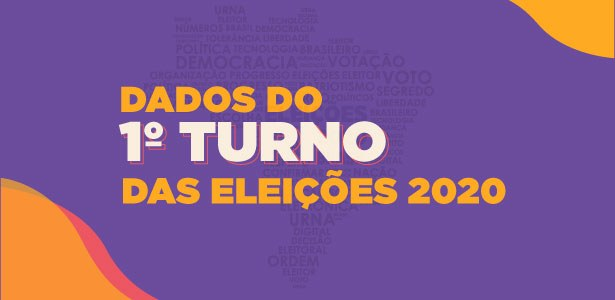

Fonte Oficiais dos dados: https://dadosabertos.tse.jus.br/dataset/

In [ ]:
# Modelagem de dados
import pandas as pd
import numpy as np

# Libs gráficas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Configurações no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configurações no Matplot
plt.rcParams['figure.figsize'] = ( 15, 6 )
plt.style.use('ggplot')

# **Importação dos dados**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# Dados
#base_dados = pd.read_csv('clean_data.csv')
base_dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Masterclass Especial Eleições - DataViking/clean_data.csv", encoding= 'utf-8')

In [29]:
# Dimensao
base_dados.shape

(518675, 29)

In [30]:
# Veririfcar
base_dados.head()

,Unnamed: 0,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


In [31]:
# Informações do dataset
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518675 entries, 0 to 518674
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  518675 non-null  int64  
 1   uf                          518675 non-null  object 
 2   type_id                     518675 non-null  int64  
 3   codigo_tse                  518675 non-null  int64  
 4   nome_municipio              518675 non-null  object 
 5   capital                     518675 non-null  int64  
 6   codigo_ibge                 518675 non-null  int64  
 7   job_count                   518675 non-null  int64  
 8   elector_count               518675 non-null  object 
 9   elector_presence            518675 non-null  int64  
 10  absentees                   518675 non-null  int64  
 11  nominal_votes               518675 non-null  int64  
 12  blank_votes                 518675 non-null  int64  
 13  total_null_vot

In [32]:
# Nulos
base_dados.isnull().sum()

Unnamed: 0                        0
uf                                0
type_id                           0
codigo_tse                        0
nome_municipio                    0
capital                           0
codigo_ibge                       0
job_count                         0
elector_count                     0
elector_presence                  0
absentees                         0
nominal_votes                     0
blank_votes                       0
total_null_votes                  0
null_votes                        0
technical_null_votes              0
valid_votes                       0
nulled_votes                      0
judically_nulled_votes            0
vote_count                        0
candidate_number                  0
candidate_name                    3
candidate_coligation              0
candidate_vice_name               0
candidate_vote_destination        0
candidate_vote_count              0
legend_votes                  18640
job                         

In [33]:
# Campos unicos
base_dados.nunique()

Unnamed: 0                    518675
uf                                26
type_id                            2
codigo_tse                      5568
nome_municipio                  5294
capital                            2
codigo_ibge                     5568
job_count                         33
elector_count                      2
elector_presence                4864
absentees                       3562
nominal_votes                   8361
blank_votes                     1784
total_null_votes                2194
null_votes                      2177
technical_null_votes             236
valid_votes                     8402
nulled_votes                      10
judically_nulled_votes          1046
vote_count                      4864
candidate_number               20334
candidate_name                394364
candidate_coligation            7941
candidate_vice_name            16997
candidate_vote_destination         4
candidate_vote_count            8730
legend_votes                    1736
j

In [34]:
# Retirar a coluna
base_dados.drop( columns=['Unnamed: 0'], inplace=True )

In [35]:
# Verificar
base_dados.head()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
0,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,11,CAETANO,PP - PP / SOLIDARIEDADE / PSD,MARQUINHOS,Válido,2405,NaN,prefeito,PP
1,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,12,HADAMÉS WILSON,PDT,LUCAS NOBRE,Válido,1237,NaN,prefeito,PDT
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
3,AC,11,1120,ACRELÂNDIA,0,1200013,1,n,7093,2076,6849,54,190,190,0,6849,0,0,7093,90,ROSA DO EURICO,PROS - PSL / PROS,LUIZ DO GÁS,Válido,569,NaN,prefeito,PROS
4,AC,13,1120,ACRELÂNDIA,0,1200013,9,n,7093,2076,6482,76,120,120,0,6897,0,0,7093,11130,PAULA CLEURIDES,PP,,Válido,1,415.0,vereador,PP


# **Analise Macros**

## **Prefeitos eleitos no país**

In [36]:
# Campos únicos
base_dados['job'].unique(), base_dados['elector_count'].unique()

(array(['prefeito', 'vereador'], dtype=object),
 array(['n', 's'], dtype=object))

In [39]:
# Filtro prefeitos eleitos
query_prefeitos = base_dados[
    ( base_dados['job'] == 'prefeito') &
    ( base_dados['elector_count'] == 's')
]

In [40]:
# Visualização dos dados
query_prefeitos.head()

,uf,type_id,codigo_tse,nome_municipio,capital,codigo_ibge,job_count,elector_count,elector_presence,absentees,nominal_votes,blank_votes,total_null_votes,null_votes,technical_null_votes,valid_votes,nulled_votes,judically_nulled_votes,vote_count,candidate_number,candidate_name,candidate_coligation,candidate_vice_name,candidate_vote_destination,candidate_vote_count,legend_votes,job,main_party
2,AC,11,1120,ACRELÂNDIA,0,1200013,1,s,7093,2076,6849,54,190,190,0,6849,0,0,7093,15,OLAVINHO,MDB - PL / MDB / PSDB,GRAIA,Válido,2638,NaN,prefeito,MDB
85,AC,11,1570,ASSIS BRASIL,0,1200054,1,s,4918,995,4765,24,129,129,0,4765,0,0,4918,13,PROFESSOR JERRY,PT,SARGENTO REGINALDO MARTINS,Válido,1583,NaN,prefeito,PT
167,AC,11,1058,BRASILÉIA,0,1200104,1,s,13522,3322,12868,125,529,529,0,12868,0,0,13522,13,FERNANDA HASSEM,PT - SOLIDARIEDADE / PC do B / DC / PROS / PSB...,CARLINHOS DO PELADO,Válido,7651,NaN,prefeito,PT
303,AC,11,1007,BUJARI,0,1200138,1,s,7387,2226,7051,79,257,257,0,7051,0,0,7387,12,PADEIRO,PDT - MDB / PC do B / PDT / DEM,FRANCISCO CHAGAS,Válido,3386,NaN,prefeito,PDT
430,AC,11,1015,CAPIXABA,0,1200179,1,s,6108,1432,5897,43,168,168,0,5897,0,0,6108,25,MANOEL MAIA,DEM - DEM / SOLIDARIEDADE / PSDB / PROS / PP,RICHARD LIMA,Válido,2627,NaN,prefeito,DEM


In [41]:
# Tamanho da base de prefeitos eleitos
query_prefeitos.shape

(5519, 28)

In [48]:
# Analise
analise_01 = query_prefeitos.groupby( by= ['main_party'] ).agg(
    Quantidade= ('candidate_vote_count', 'count')
)
# Verificação
analise_01.sort_values(by= 'Quantidade', ascending= False)

,Quantidade
main_party,
MDB,787
PP,687
PSD,660
PSDB,526
DEM,467
PL,345
PDT,315
PSB,258
PTB,214


In [71]:
# Quantidade Prefeitos Eleitos
qtd_prefeitos_eleitos = analise_01['Quantidade'].sum()

qtd_prefeitos_eleitos

5519

In [72]:
# Verificar percentual de prefeitos eleitos
analise_01['Quantidade']

main_party
AVANTE            82
CIDADANIA        141
DC                 1
DEM              467
MDB              787
NOVO               1
PATRIOTA          50
PC                47
PDT              315
PL               345
PMB                1
PMN               13
PODE             105
PP               687
PROS              42
PRTB               6
PSB              258
PSC              118
PSD              660
PSDB             526
PSL               92
PSOL               6
PT               194
PTB              214
PTC                1
PV                46
REDE               6
REPUBLICANOS     213
SOLIDARIEDADE     95
Name: Quantidade, dtype: int64

In [77]:
# Calculando o percentual de prefeitos eleitos em relação ao total de prefeitos eleitos no país
analise_01["%"] = analise_01['Quantidade'] / qtd_prefeitos_eleitos * 100
analise_01["%"] = round(analise_01["%"], 2)

# Ordenando os resultados
analise_01.sort_values('Quantidade', inplace= True, ascending= False)
analise_01.head()

,Quantidade,%
main_party,,
MDB,787,14.26
PP,687,12.45
PSD,660,11.96
PSDB,526,9.53
DEM,467,8.46


In [87]:
# Paleta de cores
sns.color_palette('magma', len(analise_01) )

[(0.013708, 0.011771, 0.068667),
 (0.04383, 0.03383, 0.141886),
 (0.078815, 0.054184, 0.211667),
 (0.123833, 0.067295, 0.295879),
 (0.171713, 0.067305, 0.370771),
 (0.232077, 0.059889, 0.437695),
 (0.284951, 0.063168, 0.472451),
 (0.341482, 0.080564, 0.492631),
 (0.390384, 0.100379, 0.501864),
 (0.445163, 0.122724, 0.506901),
 (0.494258, 0.141462, 0.507988),
 (0.550287, 0.161158, 0.505719),
 (0.600868, 0.177743, 0.500394),
 (0.658483, 0.196027, 0.490253),
 (0.716387, 0.214982, 0.47529),
 (0.767398, 0.233705, 0.457755),
 (0.822926, 0.259016, 0.433573),
 (0.868793, 0.287728, 0.409303),
 (0.913354, 0.330052, 0.382563),
 (0.944006, 0.377643, 0.365136),
 (0.967671, 0.439703, 0.35981),
 (0.981, 0.498428, 0.369734),
 (0.990138, 0.565296, 0.395122),
 (0.994738, 0.62435, 0.427397),
 (0.997077, 0.690088, 0.471811),
 (0.997228, 0.747981, 0.516859),
 (0.99568, 0.812706, 0.572645),
 (0.99317, 0.870024, 0.626189),
 (0.989815, 0.934329, 0.690198)]

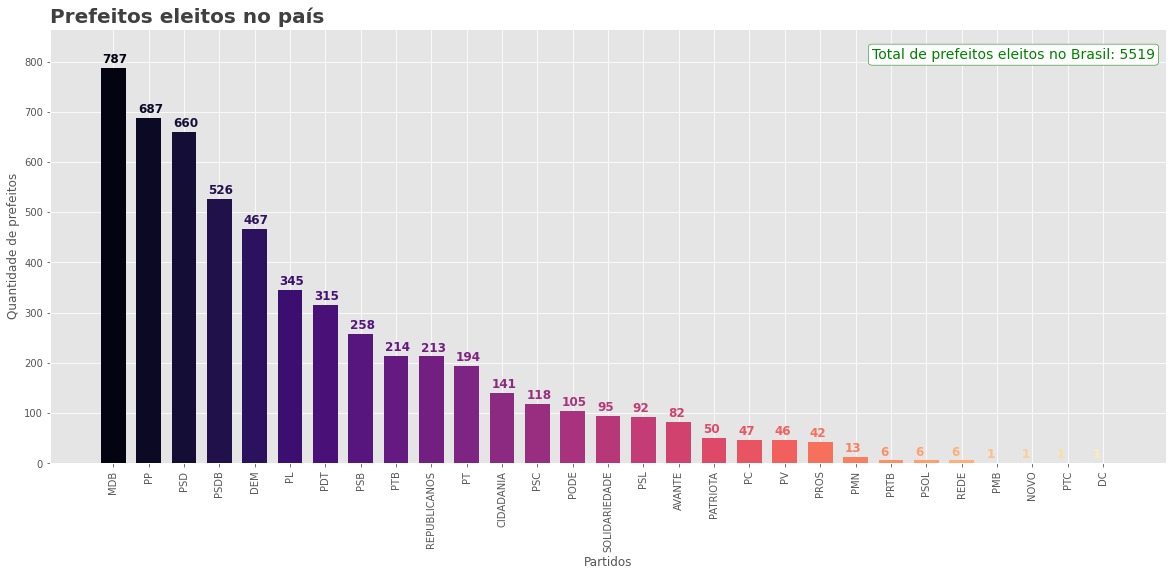

In [148]:
# Tamanho
plt.figure( figsize=( 20, 8 ))

# Paleta de cores
paleta_cores = sns.color_palette('magma', len(analise_01) )

# Plot
plt.bar(
    analise_01.index,
    analise_01['Quantidade'],
    width= 0.7,
    color= paleta_cores
     );

# Adicionando título ao gráfico
plt.title('Prefeitos eleitos no país', loc= 'left', fontsize= 20, color= '#404040', fontweight= 600)

# Adicionando labels
plt.ylabel("Quantidade de prefeitos")
plt.xlabel("Partidos")
plt.xticks(rotation= 90)

# Ajustando a escala do gráfico automaticamente
plt.ylim(0, analise_01['Quantidade'].max() + (analise_01['Quantidade'].max() * 0.1 ) )

# Adicionando rótulos de valores no gráfico
for posicao, valor in enumerate(analise_01["Quantidade"] ):
  plt.text(
      # Posição do gráfico ( x, y )
      posicao - 0.3, valor + 10,
      # Valor no gráfico
      valor,
      # Paleta cores
      color= paleta_cores[posicao],
      # Tamanho
      size = 12,
      # espessura da fonte
      fontweight= 700
  )

# Total de eleitos
total_eleitos = analise_01['Quantidade'].sum()

# Incluindo informação
plt.annotate(
    f'Total de prefeitos eleitos no Brasil: {total_eleitos}',
    xy= (0.99, 0.94),
    xycoords = 'axes fraction', 
    ha= 'right', 
    va= 'center',
    color= 'green',
    fontsize= 14,
    fontweight=500,
    bbox= dict(facecolor= '#ffffff', edgecolor= 'green', boxstyle= 'round', pad=0.25)
    
)

# Visualizando o gráfico
plt.show();

In [98]:
for posicao, valor in enumerate(analise_01["Quantidade"] ):
  print(posicao, valor)

0 787
1 687
2 660
3 526
4 467
5 345
6 315
7 258
8 214
9 213
10 194
11 141
12 118
13 105
14 95
15 92
16 82
17 50
18 47
19 46
20 42
21 13
22 6
23 6
24 6
25 1
26 1
27 1
28 1


## **Vereadores eleitos no país**

In [128]:
# Filtro prefeitos eleitos
query_vereadores = base_dados[
    ( base_dados['job'] == 'vereador') &
    ( base_dados['elector_count'] == 's')
]

# Tamanho da base de vereadores eleitos
query_vereadores.shape

(57866, 28)

In [130]:
# Análise vereadores eleitos
analise_02 = query_vereadores.groupby(by= ['main_party']).agg(
    Quantidade= ('candidate_vote_count', 'count')
)

# Verificação
analise_02.head()

,Quantidade
main_party,
AVANTE,1046
CIDADANIA,1583
DC,121
DEM,4335
MDB,7311


In [131]:
# Quantidade de vereadores eleitos
qtde_vereadores_eleitos = analise_02['Quantidade'].sum()

qtde_vereadores_eleitos

57866

In [134]:
# Verificando o percentual de eleitos
analise_02['%'] = analise_02['Quantidade'] / qtde_vereadores_eleitos * 100
analise_02['%'] = round(analise_02['%'], 2)

# Ordenando os valores em ordem descrescente
analise_02.sort_values('Quantidade', ascending= False, inplace= True)


analise_02.head()

,Quantidade,%
main_party,,
MDB,7311,12.63
PP,6331,10.94
PSD,5676,9.81
PSDB,4368,7.55
DEM,4335,7.49


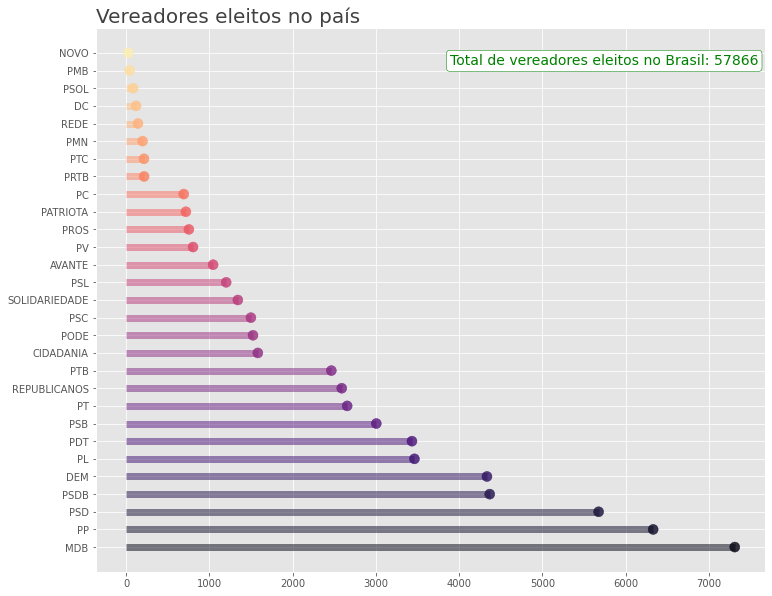

In [147]:
# Tamanho
plt.figure( figsize= (12, 10) )


# Plot
plt.hlines(
    # Dados
    y= analise_02.index, xmin=0, xmax= analise_02['Quantidade'],
    # Espessura da linha
    lw=7,
    # Paleta de cores
    color= paleta_cores,
    # Transparência
    alpha= 0.5

)

# Plot dos pontos
plt.scatter(
    # Dados
    analise_02['Quantidade'],
    analise_02.index,
    # Tamanho do ponto
    s= 100,
    # Cor
    color = paleta_cores,
    # Transparência
    alpha= 0.8
)

# Inserindo título
plt.title('Vereadores eleitos no país', loc= 'left', fontsize=20, color= '#404040', fontweight= 500)

total_eleitos = analise_02['Quantidade'].sum()

# Incluindo informação
plt.annotate(
    f'Total de vereadores eleitos no Brasil: {total_eleitos}',
    xy= (0.99, 0.94),
    xycoords = 'axes fraction', 
    ha= 'right', 
    va= 'center',
    color= 'green',
    fontsize= 14,
    fontweight=500,
    bbox= dict(facecolor= '#ffffff', edgecolor= 'green', boxstyle= 'round', pad=0.25)
    
)

# Visualização do gráfico
plt.show();

## **Analise de Correlação**

In [149]:
len(analise_01), len(analise_02)

(29, 29)

In [152]:
# Criando uma nova tabela 
tab_correlacao = analise_01['Quantidade'].reset_index()

# Cruzamento das 2 tabelas de análises
tab_correlacao = pd.merge(tab_correlacao, analise_02.reset_index(), on=['main_party'], how= 'inner')

# Renomeando as colunas
tab_correlacao.columns = ['Partido', 'Prefeitos', 'Vereadores', '%']

tab_correlacao

,Partido,Prefeitos,Vereadores,%
0,MDB,787,7311,12.63
1,PP,687,6331,10.94
2,PSD,660,5676,9.81
3,PSDB,526,4368,7.55
4,DEM,467,4335,7.49
5,PL,345,3464,5.99
6,PDT,315,3434,5.93
7,PSB,258,3006,5.19
8,PTB,214,2466,4.26
9,REPUBLICANOS,213,2591,4.48


In [153]:
# Excluindo a coluna %
tab_correlacao.drop(columns=['%'], inplace= True)

# Verificando a tabela
tab_correlacao.head()

,Partido,Prefeitos,Vereadores
0,MDB,787,7311
1,PP,687,6331
2,PSD,660,5676
3,PSDB,526,4368
4,DEM,467,4335


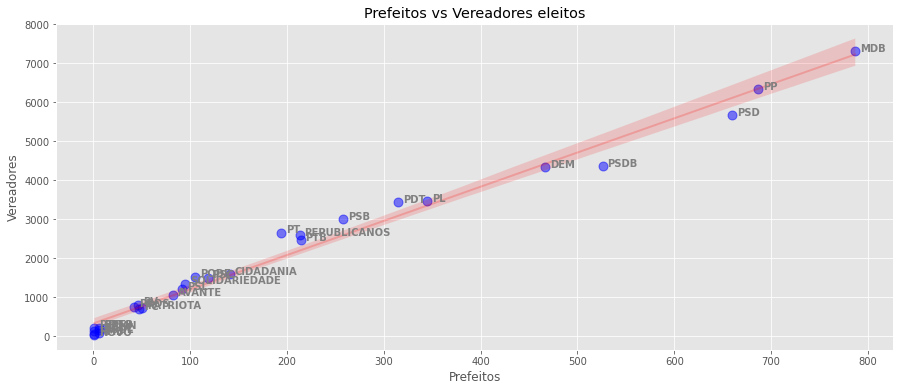

In [176]:
# Plot da regressão

sns.regplot(    
    # Dados
    x = tab_correlacao['Prefeitos'],
    y = tab_correlacao['Vereadores'],

    # Intervalo de confiança para estimar a regressão
    ci = 95,

    # Cor dos pontos
    scatter_kws= {
        'color': 'blue',
        's' : 80,
        'alpha': 0.5
    },

    # Cor da linha
    line_kws = {
        'color': 'red',
        'alpha': 0.2,
        'lw': 2

    }
   
)

# Inclusão de título
plt.title("Prefeitos vs Vereadores eleitos")

# Loop para inclusão dos nomes dos partidos
for linha in range(0, len(tab_correlacao) ):

  # Inclusão dos valores dos partidos
  plt.text(
      tab_correlacao['Prefeitos'][linha] + 5.0,
      tab_correlacao['Vereadores'][linha] - 2.0,
       tab_correlacao['Partido'][linha] ,
       size= 'medium',
       color= 'gray',
       weight= 'semibold'

  )


# Visualização do gráfico
plt.show();

## **Plot Tridimensional**

In [182]:
# Sumarizando a quantidade de candidatos
qtde_candidatos = base_dados.groupby(by=['main_party'] ).count().iloc[:, 0:1].reset_index()

# Renomeando as colunas
qtde_candidatos.columns= ['Partido', 'Candidatos']

# Visualizando a tabela
qtde_candidatos.head()

,Partido,Candidatos
0,AVANTE,14228
1,CIDADANIA,16390
2,DC,4385
3,DEM,31212
4,MDB,42169


In [185]:
# Cruzando a tabela de correlação com a quantidade de candidatos

tab_correlacao = pd.merge( tab_correlacao, qtde_candidatos, on=['Partido'], how= 'inner')

# Visualizando a tabela
tab_correlacao.head()

,Partido,Prefeitos,Vereadores,Candidatos
0,MDB,787,7311,42169
1,PP,687,6331,36158
2,PSD,660,5676,37271
3,PSDB,526,4368,31011
4,DEM,467,4335,31212


In [186]:
# Correlação
tab_correlacao.corr()

# 1 a -1
# próximo 1: correlação positiva (Ambos crescem)
# próximo -1: correlação negativa (Um cresce e o outro desce)

,Prefeitos,Vereadores,Candidatos
Prefeitos,1.000000,0.990918,0.916985
Vereadores,0.990918,1.000000,0.952979
Candidatos,0.916985,0.952979,1.000000


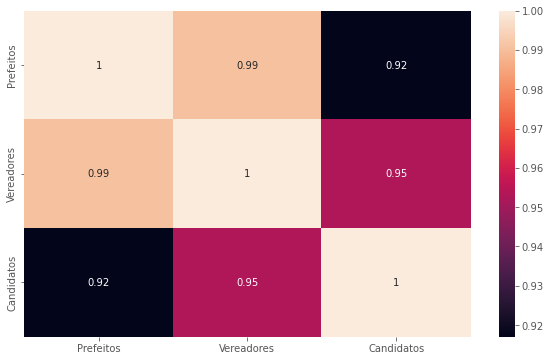

In [191]:
# Visualizando a correlação
plt.figure(figsize=(10, 6))
sns.heatmap(tab_correlacao.corr(), annot= True)

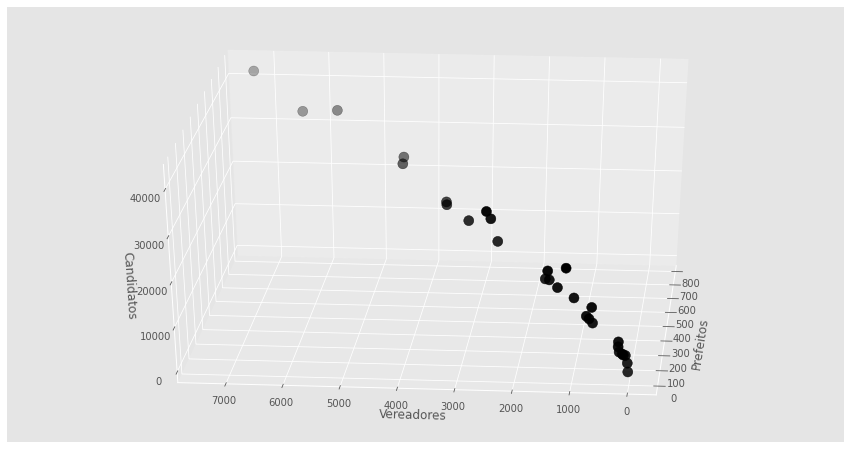

In [189]:
# Plot tridimensional

# Tamanho
figura = plt.figure( figsize= (15, 8) )

# Instanciando o plot
eixo = figura.add_subplot( 111, projection= '3d')

# Plot
eixo.scatter(
    tab_correlacao['Prefeitos'],
    tab_correlacao['Vereadores'],
    tab_correlacao['Candidatos'],
    c = 'black',
    s = 100
)

# Rotação
eixo.view_init(30, 185)


# Definindo os labels
eixo.set_xlabel('Prefeitos')
eixo.set_ylabel('Vereadores')
eixo.set_zlabel('Candidatos')

# Visualização do gráfico
plt.show()

In [194]:
# Plot 3D utilizando o Plotly
figura = px.scatter_3d(
    tab_correlacao,
    x = 'Prefeitos',
    y = 'Vereadores',
    z = 'Candidatos',
    color= 'Partido',
    opacity = 0.7,
    symbol= 'Partido'
)

figura.show()